Cluster for cluster_0.2 with leiden


/root/miniconda3/envs/cmml/lib/python3.11/site-packages/scib/metrics/clustering.py:96: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  cluster_function(adata, resolution=res, key_added=resolution_key, **kwargs)


Cluster for cluster_0.4 with leiden
Cluster for cluster_0.6 with leiden
Cluster for cluster_0.8 with leiden
Cluster for cluster_1.0 with leiden
Cluster for cluster_1.2 with leiden
Cluster for cluster_1.4 with leiden
Cluster for cluster_1.6 with leiden
Cluster for cluster_1.8 with leiden
Cluster for cluster_2.0 with leiden
NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
Cluster for iso_label_0.2 with leiden


/root/miniconda3/envs/cmml/lib/python3.11/site-packages/scib/metrics/isolated_labels.py:311: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  batch_per_lab = tmp.groupby(label_key).agg({batch_key: "count"})


Cluster for iso_label_0.4 with leiden
Cluster for iso_label_0.6 with leiden
Cluster for iso_label_0.8 with leiden
Cluster for iso_label_1.0 with leiden
Cluster for iso_label_1.2 with leiden
Cluster for iso_label_1.4 with leiden
Cluster for iso_label_1.6 with leiden
Cluster for iso_label_1.8 with leiden
Cluster for iso_label_2.0 with leiden
Isolated labels ASW...


/root/miniconda3/envs/cmml/lib/python3.11/site-packages/scib/metrics/isolated_labels.py:311: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  batch_per_lab = tmp.groupby(label_key).agg({batch_key: "count"})


Graph connectivity...
                                  0
NMI_cluster/label          0.672776
ARI_cluster/label          0.419044
ASW_label                  0.576760
ASW_label/batch            0.828834
PCR_batch                  0.000000
cell_cycle_conservation         NaN
isolated_label_F1          0.135922
isolated_label_silhouette  0.780864
graph_conn                 0.964067
kBET                            NaN
iLISI                           NaN
cLISI                           NaN
hvg_overlap                     NaN
trajectory                      NaN


/root/miniconda3/envs/cmml/lib/python3.11/site-packages/scib/metrics/graph_connectivity.py:56: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(labels)
/root/miniconda3/envs/cmml/lib/python3.11/site-packages/scib/metrics/graph_connectivity.py:56: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(labels)
/root/miniconda3/envs/cmml/lib/python3.11/site-packages/scib/metrics/graph_connectivity.py:56: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(labels)
/root/miniconda3/envs/cmml/lib/python3.11/site-packages/scib/metrics/graph_connectivity.py:56: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() i

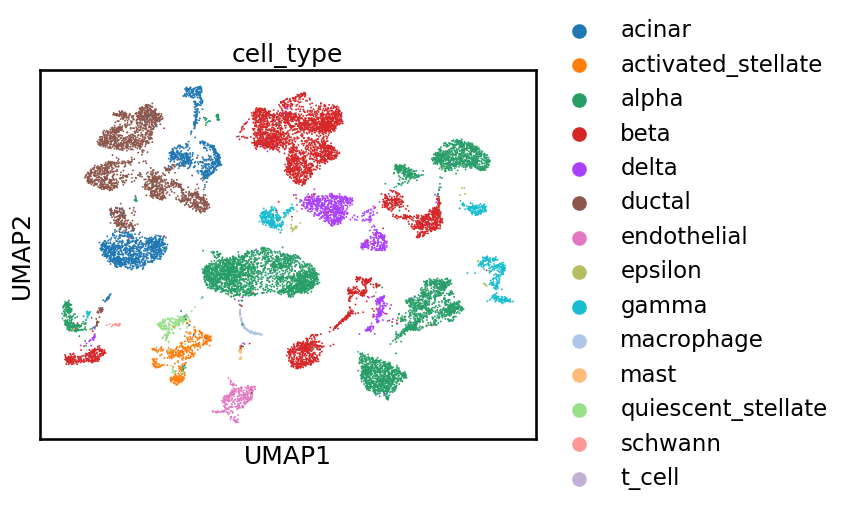

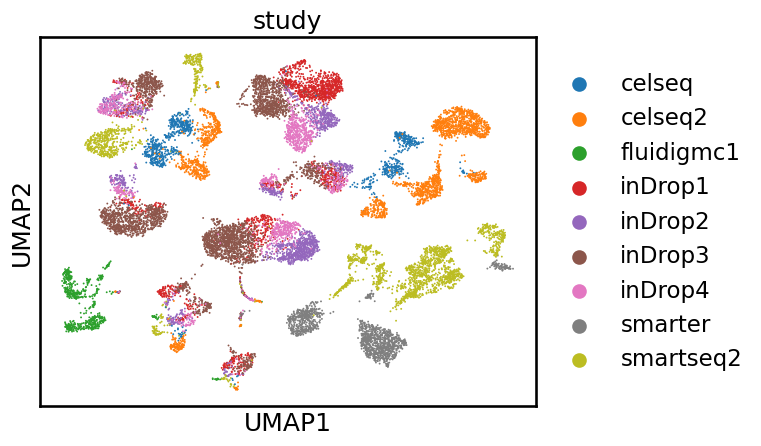

In [1]:
import scanpy as sc
import scib
import matplotlib.pyplot as plt

# 1. 加载数据
adata = sc.read_h5ad('pancreas.h5ad')

# 2. 预处理数据
# 归一化：将每个细胞的总计数归一化到 10,000
sc.pp.normalize_total(adata, target_sum=1e4)
# 对数转换：稳定方差
sc.pp.log1p(adata)
# 选择高变基因：选择 4000 个高变基因以减少维度
sc.pp.highly_variable_genes(adata, n_top_genes=4000)
# 子集化数据：仅保留高变基因
adata = adata[:, adata.var.highly_variable].copy()
# 标准化：将数据缩放到零均值和单位方差
sc.pp.scale(adata, max_value=10)
# 计算 PCA：生成 50 个主成分
sc.pp.pca(adata, n_comps=50)
# 计算邻居图：用于图连通性等指标
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X_pca')
# 计算 UMAP：用于可视化
sc.tl.umap(adata)

# 3. 计算评估指标
metrics_df = scib.metrics.metrics(
    adata,                   # 原始数据
    adata,                   # 用同一数据作为“集成数据”，评估原始嵌入
    batch_key='study',       # 批次键，根据上下文假设为 'study'
    label_key='cell_type',   # 标签键，根据上下文假设为 'cell_type'
    isolated_labels_asw_=True,   # 计算孤立标签轮廓系数
    silhouette_=True,        # 计算细胞类型和批次的轮廓系数
    graph_conn_=True,        # 计算图连通性
    pcr_=True,               # 计算主成分回归
    isolated_labels_f1_=True,    # 计算孤立标签 F1 分数
    nmi_=True,               # 计算 NMI
    ari_=True,               # 计算 ARI
    embed='X_pca'            # 指定使用 PCA 嵌入进行计算
)

# 输出指标结果
print(metrics_df)

# 保存指标到 CSV 文件
metrics_df.to_csv('raw_data_metrics.csv')

# 4. 生成 UMAP 可视化
# 按细胞类型着色的 UMAP 图
sc.pl.umap(adata, color='cell_type', save='_cell_type.png')
# 按批次（study）着色的 UMAP 图
sc.pl.umap(adata, color='study', save='_study.png')